In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bs import BSCall, BSPut
from mc import mc
from bm import bm_european, bm_american

Text(0.5, 1.0, 'Comparison of Call Option Prices')

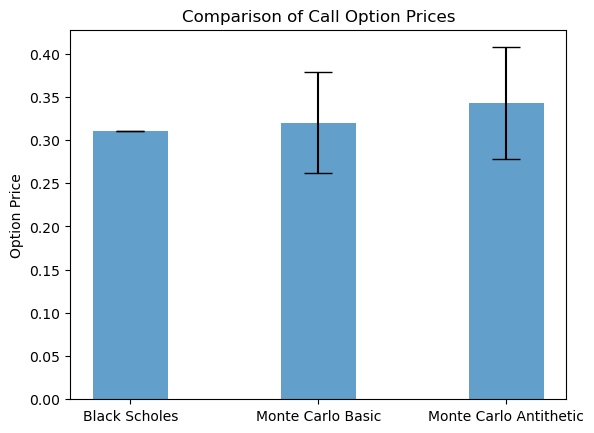

In [2]:
# 2 Monte Carlo Implementation
# b) Plots

S = 50
K = 70
q = 0.02
r = 0.05
sigma = 0.2
T = 1
n = 1000

# Call options first
BS_call = BSCall(S, K, q, r, sigma, T)
mc_call, mc_call_error = mc(S, K, q, r, sigma, T, n, True, False)
mc_call_antithetic, mc_call_anti_error = mc(S, K, q, r, sigma, T, n, True, True)

labels = ['Black Scholes', 'Monte Carlo Basic', 'Monte Carlo Antithetic']
prices = [BS_call, mc_call, mc_call_antithetic]
error = [0, mc_call_error, mc_call_anti_error]

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), prices, yerr = error, alpha = 0.7, capsize = 10, width = 0.4)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Option Price')
ax.set_title('Comparison of Call Option Prices')

Text(0.5, 1.0, 'Comparison of Put Option Prices')

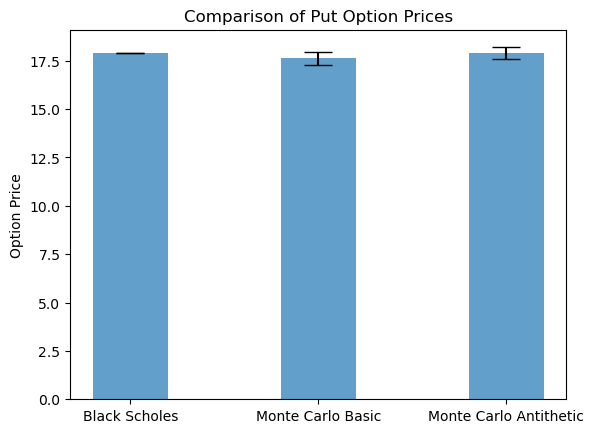

In [3]:
# Now put options
S = 50
K = 70
q = 0.02
r = 0.05
sigma = 0.2
T = 1
n = 1000

BS_put = BSPut(S, K, q, r, sigma, T)
mc_put, mc_put_error = mc(S, K, q, r, sigma, T, n, False, False)
mc_put_antithetic, mc_put_anti_error = mc(S, K, q, r, sigma, T, n, False, True)

labels = ['Black Scholes', 'Monte Carlo Basic', 'Monte Carlo Antithetic']
prices = [BS_put, mc_put, mc_put_antithetic]
error = [0, mc_put_error, mc_put_anti_error]

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), prices, yerr = error, alpha = 0.7, capsize = 10, width = 0.4)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Option Price')
ax.set_title('Comparison of Put Option Prices')

As shown from the graphs, the antithetic estimator is generally superior compared to the basic estimator. However, for both antithetic and basic, Monte Carlo is more accurate for put options as opposed to call options. This makes sense since the chosen strike price is higher than the chosen stock price. Monte Carlo would likely work better for call options if our chosen stock price was higher than the strike.

Text(0.5, 1.0, 'Comparison of Call Option Prices')

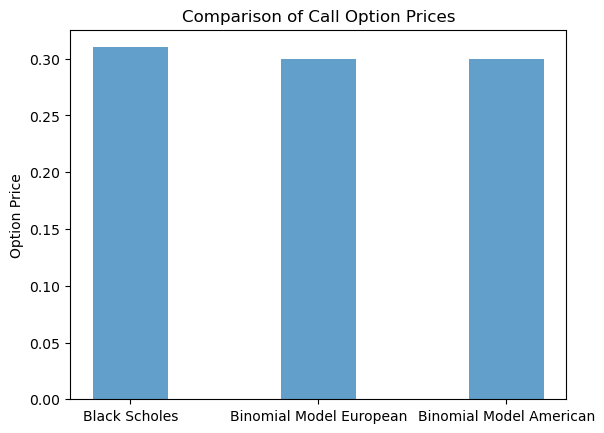

In [4]:
#3 Binomial model implementation
# c) Plots
S = 50
K = 70
q = 0.02
r = 0.05
sigma = 0.2
T = 1
n = 10

# Call options first
BS_call = BSCall(S, K, q, r, sigma, T)
bm_european_call = bm_european(S, K, q, r, sigma, T, n)
bm_american_call = bm_american(S, K, q, r, sigma, T, n)

labels = ['Black Scholes', 'Binomial Model European', 'Binomial Model American']
prices = [BS_call, bm_european_call, bm_american_call]

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), prices, alpha = 0.7, capsize = 10, width = 0.4)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Option Price')
ax.set_title('Comparison of Call Option Prices')

Text(0.5, 1.0, 'Comparison of Put Option Prices')

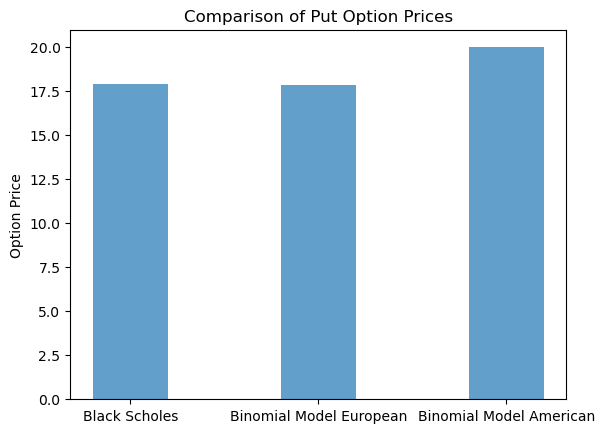

In [5]:
# Now put options
S = 50
K = 70
q = 0.02
r = 0.05
sigma = 0.2
T = 1
n = 10

BS_put = BSPut(S, K, q, r, sigma, T)
bm_european_put = bm_european(S, K, q, r, sigma, T, n, isCall = False)
bm_american_put = bm_american(S, K, q, r, sigma, T, n, isCall = False)

labels = ['Black Scholes', 'Binomial Model European', 'Binomial Model American']
prices = [BS_put, bm_european_put, bm_american_put]

fig, ax = plt.subplots()
ax.bar(np.arange(len(labels)), prices, alpha = 0.7, capsize = 10, width = 0.4)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Option Price')
ax.set_title('Comparison of Put Option Prices')